In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crimes by category analysis

Unit: Per hundred thousand inhabitants

In [33]:
crimes_df = pd.read_csv('../processed_data/crimes_crime_by_category.csv')
crimes_df['geo'] = crimes_df['geo'].replace({'Northern Ireland (UK) (NUTS 2021)': 'Northern Ireland'})
crimes_df['geo'] = crimes_df['geo'].replace({'Scotland (NUTS 2021)': 'Scotland'})
crimes_df = crimes_df[~crimes_df['geo'].isin(['Northern Ireland', 'Scotland', 'England and Wales', 'Kosovo*', 'Bosnia and Herzegovina'])]


In [12]:
pivot_df = crimes_df.pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

In [13]:
fig = px.imshow(
        pivot,
        labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
        x=pivot.columns,
        y=pivot.index,
        title="Total Crimes per Country per Year (sum of all categories)",
        color_continuous_scale="YlOrRd",
        aspect="auto",
        width=1200,
        height=600,
        text_auto=True
    )
fig.show()


In [76]:
liberal = ["France", "Italy", "Germany", "Sweden", "Spain", "Austria"]
conservs = ["Poland", "Bulgaria", "Romania", "Hungary",  "Greece"]
selected = liberal + conservs


In [18]:
pivot_df = crimes_df[crimes_df['geo'].isin(liberal)].pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

fig = px.imshow(
        pivot,
        labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
        x=pivot.columns,
        y=pivot.index,
        title="Total Crimes per Year (sum of all categories) in selected liberal contries",
        color_continuous_scale="YlOrRd",
        aspect="auto",
        width=1200,
        height=600,
        text_auto=True
    )
fig.show()

In [24]:
pivot_df = crimes_df[crimes_df['geo'].isin(conservs)].pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

df_long = pivot.reset_index().melt(id_vars='year', var_name='Country', value_name='Total Crimes')

fig = px.line(
    df_long,
    x='year',
    y='Total Crimes',
    color='Country',
    title="Total Crimes per Year (sum of all categories) in selected conservative countries",
    labels={
        'year': 'Year',
        'Total Crimes': 'Total Crimes per 100,000 Population',
        'Country': 'Country'
    },
    width=1200,
    height=600,
    markers=True
)

fig.show()


In [25]:
pivot_df = crimes_df[crimes_df['geo'].isin(selected)].pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

fig = px.imshow(
        pivot,
        labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
        x=pivot.columns,
        y=pivot.index,
        title="Total Crimes per Year (sum of all categories) in selected countries",
        color_continuous_scale="YlOrRd",
        aspect="auto",
        width=1200,
        height=600,
        text_auto=True
    )
fig.show()

Ilość popełnianych przestępstw w krajach liberalych jest znacznie wyższa niż w krajach konserwatywnych na przestrzesni wszystkich badanych lat

### Analiza kateorii przestępstw dla wszystkich badanych krajów

In [27]:
for country in selected:
    pivot_df = crimes_df[crimes_df['geo'] == country].pivot_table(
        index='year',
        columns='iccs',
        values='Crimes num',
        aggfunc="sum"
    )
    sorted_columns = pivot_df.mean().sort_values(ascending=True).index
    pivot = pivot_df.loc[:, sorted_columns]

    fig = px.imshow(
            pivot,
            labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
            x=pivot.columns,
            y=pivot.index,
            title=f"Total Crimes per Year in {country}",
            color_continuous_scale="YlOrRd",
            aspect="auto",
            width=1200,
            height=600,
            text_auto=True
        )
    fig.show()

W ogólności we wszystkich krajach rozkład wygląda podobnie.

Zdecydowano się wybrać niektóre kategorie i je przeksplorować.

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots



selected_cat = [
    'Theft', 'Theft of a motorized vehicle or parts thereof',
    'Unlawful acts involving controlled drugs or precursors',
    'Sexual assault', 'Corruption', 'Sexual violence', 'Rape',
    'Sexual exploitation', 'Fraud', 'Burglary', 'Robbery'
]

for cat in selected_cat:
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Conservative Countries", "Liberal Countries"),
        shared_yaxes=True
    )
    
    df_conservative = crimes_df[
        (crimes_df['geo'].isin(conservs)) & (crimes_df['iccs'] == cat)
    ]
    
    for country in conservs:
        country_df = df_conservative[df_conservative['geo'] == country].sort_values('year')
        fig.add_trace(
            go.Scatter(
                x=country_df['year'],
                y=country_df['Crimes num'],
                mode='lines+markers',
                name=country
            ),
            row=1, col=1
        )
    

    df_liberal = crimes_df[
        (crimes_df['geo'].isin(liberal)) & (crimes_df['iccs'] == cat)
    ]
    
    for country in liberal:
        country_df = df_liberal[df_liberal['geo'] == country].sort_values('year')
        fig.add_trace(
            go.Scatter(
                x=country_df['year'],
                y=country_df['Crimes num'],
                mode='lines+markers',
                name=country,
                showlegend=False  # legendę pokażemy tylko raz (po lewej)
            ),
            row=1, col=2
        )
    
    fig.update_layout(
        title_text=f"{cat}: Total crimes reported",
        width=1200,
        height=500,
        legend_title="Country"
    )
    
    fig.show()


* Wszystkich badanych kategorii przestępstw jest więcej w krajach otwartych na migrantów.
* W ogólności przestępstwa związane z kradzieżami wykazują trend malejący lub pozostają na podobnym poziomie.
* Liczba przestępstw związanych z seksualnością maleje/pozostaje na podobnym poziomie w krajach zamkniętych na migracje (wyjątek: Polska), a rośnie w krajach otwartych.
* Szwecja jest ekstremalnym przypadkiem, jeżeli chodzi o liczbę przestępstw - zarówno całościowo, jak i zwłaszcza tych związanych z narkotykami i przemocą seksualną

### Korelacje z liczbą migrantów

In [85]:
crimes_df['iccs'].unique()

array(['Intentional homicide', 'Attempted intentional homicide',
       'Serious assault', 'Kidnapping', 'Sexual violence', 'Rape',
       'Sexual assault', 'Sexual exploitation', 'Child pornography',
       'Robbery', 'Burglary', 'Burglary of private residential premises',
       'Theft', 'Theft of a motorized vehicle or parts thereof',
       'Unlawful acts involving controlled drugs or precursors', 'Fraud',
       'Corruption', 'Bribery', 'Money laundering',
       'Acts against computer systems',
       'Participation in an organized criminal group'], dtype=object)

In [86]:
crime_groups = {
    "Sexual crimes": [
        'Sexual violence', 'Rape', 'Sexual assault', 'Sexual exploitation', 'Child pornography'
    ],
    "Offenses against the person": [
        'Intentional homicide', 'Attempted intentional homicide', 'Serious assault', 'Kidnapping'
    ],
    "Property crimes": [
        'Burglary', 'Burglary of private residential premises', 'Theft', 'Theft of a motorized vehicle or parts thereof', 'Robbery'
    ],
    "Drug-related crimes": [
        'Unlawful acts involving controlled drugs or precursors'
    ],
    "Economic crimes": [
        'Fraud', 'Corruption', 'Bribery', 'Money laundering'
    ],
    "Cyber crimes": [
        'Acts against computer systems'
    ],
    "Organized crime": [
        'Participation in an organized criminal group'
    ]
}

In [87]:
def assign_group(category):
    for group, cats in crime_groups.items():
        if category in cats:
            return group
    return 'Other'  

crimes_df['crime_group'] = crimes_df['iccs'].apply(assign_group)

In [88]:
migr = pd.read_csv('../processed_data/immigration_by_citizenship_combined_data.csv')

In [89]:
merged = pd.merge(crimes_df, migr, on=['geo', 'year'])

In [90]:
merged.head()

,iccs,geo,year,Crimes num,crime_group,EU,Ukraine,national,non_EU,foreigners,foreigners_pop_share,non_EU_pop_share,ukraine_pop_share,ukraine_for_share,non_EU_for_share,iso_a3
0,Intentional homicide,Austria,2008,0.70,Offenses against the person,39541.0,604.0,8636.0,90810.0,130351.0,1.568984,1.093044,0.007270,0.463364,69.665749,AUT
1,Intentional homicide,Austria,2009,0.61,Offenses against the person,0.0,0.0,8988.0,60233.0,60233.0,0.722651,0.722651,0.000000,0.000000,100.000000,AUT
2,Intentional homicide,Austria,2010,0.73,Offenses against the person,0.0,0.0,8817.0,62610.0,62610.0,0.749673,0.749673,0.000000,0.000000,100.000000,AUT
3,Intentional homicide,Austria,2011,0.96,Offenses against the person,46842.0,680.0,8082.0,101928.0,148770.0,1.776323,1.217027,0.008119,0.457081,68.513813,AUT
4,Intentional homicide,Austria,2012,1.05,Offenses against the person,52128.0,767.0,8272.0,114725.0,166853.0,1.984427,1.364455,0.009122,0.459686,68.758128,AUT


In [91]:
sum_df = merged.groupby(['geo', 'year', 'foreigners_pop_share']).agg({
    'Crimes num': 'sum'
}).reset_index()


sum_df.head()

,geo,year,foreigners_pop_share,Crimes num
0,Austria,2008,1.568984,3896.74
1,Austria,2009,0.722651,3906.74
2,Austria,2010,0.749673,3308.21
3,Austria,2011,1.776323,3197.13
4,Austria,2012,1.984427,3212.19


In [92]:
corr =  sum_df[['foreigners_pop_share', 'Crimes num']].corr()

In [93]:
print(corr)

                      foreigners_pop_share  Crimes num
foreigners_pop_share              1.000000    0.271673
Crimes num                        0.271673    1.000000


In [94]:
categories = merged['iccs'].unique()

correlations = {}

for cat in categories:
    cat_data = merged[merged['iccs'] == cat]
    
    cat_data = cat_data.dropna(subset=['foreigners_pop_share', 'Crimes num'])
    
    if len(cat_data) < 2:
        correlations[cat] = None 
        continue
    
    corr = cat_data['foreigners_pop_share'].corr(cat_data['Crimes num'])
    correlations[cat] = corr

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print(correlation_df)

                                                    Correlation
Attempted intentional homicide                         0.416402
Unlawful acts involving controlled drugs or pre...     0.403907
Kidnapping                                             0.358268
Acts against computer systems                          0.342444
Sexual violence                                        0.325651
Sexual assault                                         0.298746
Rape                                                   0.274949
Money laundering                                       0.251309
Participation in an organized criminal group           0.228985
Sexual exploitation                                    0.219282
Burglary of private residential premises               0.210133
Theft                                                  0.165112
Burglary                                               0.145292
Child pornography                                      0.106259
Serious assault                         

In [97]:
groups = merged['crime_group'].unique()

correlations = {}

for cat in groups:
    cat_data = merged[merged['crime_group'] == cat]
    
    cat_data = cat_data.dropna(subset=['foreigners_pop_share', 'Crimes num'])
    
    if len(cat_data) < 2:
        correlations[cat] = None 
        continue
    
    corr = cat_data['foreigners_pop_share'].corr(cat_data['Crimes num'])
    correlations[cat] = corr

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print(correlation_df)

                             Correlation
Drug-related crimes             0.403907
Cyber crimes                    0.342444
Sexual crimes                   0.259605
Organized crime                 0.228985
Property crimes                 0.081715
Economic crimes                 0.059227
Offenses against the person     0.054216


In [ ]:
threshold = 0.5

results_totals = []
results_categories = []

for country in selected:
    country_data = merged[merged['geo'] == country]
    
    # all categories
    summed = country_data.groupby('year').agg({
        'Crimes num': 'sum',
        'foreigners_pop_share': 'mean'
    }).reset_index()
    
    if not summed['foreigners_pop_share'].isnull().all() and len(summed) >= 2:
        corr = summed['foreigners_pop_share'].corr(summed['Crimes num'])
        if abs(corr) >= threshold:
            results_totals.append({
                'Country': country,
                'Category': 'Total',
                'Correlation': corr
            })
    
    # in crime groups
    groups = country_data['crime_group'].unique()
    for group in groups:
        group_data = country_data[country_data['crime_group'] == group]
        group_summed = group_data.groupby('year').agg({
            'Crimes num': 'sum',
            'foreigners_pop_share': 'mean'
        }).reset_index()
        
        if not group_summed['foreigners_pop_share'].isnull().all() and len(group_summed) >= 2:
            corr_group = group_summed['foreigners_pop_share'].corr(group_summed['Crimes num'])
            if abs(corr_group) >= threshold:
                results_categories.append({
                    'Country': country,
                    'Category': group,
                    'Correlation': corr_group
                })

df_totals = pd.DataFrame(results_totals).sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)
df_categories = pd.DataFrame(results_categories).sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)

print("=== Correlations - sums all categories ===")
print(df_totals)

print("\n=== Correlations - individual crime groups ===")
print(df_categories)


=== Correlations - sums all categories ===
    Country Category  Correlation
3   Hungary    Total    -0.881461
1     Spain    Total     0.868804
0    France    Total     0.786628
2  Bulgaria    Total    -0.569719

=== Correlations - individual crime groups ===
     Country                     Category  Correlation
23   Romania                 Cyber crimes     0.970807
7      Spain                Sexual crimes     0.942987
11     Spain              Organized crime     0.874431
25   Hungary              Property crimes    -0.852309
27   Hungary              Economic crimes    -0.839638
19  Bulgaria  Offenses against the person     0.811868
26   Hungary          Drug-related crimes     0.799741
21   Romania                Sexual crimes     0.798171
24   Hungary  Offenses against the person    -0.797580
9      Spain              Economic crimes     0.796076
8      Spain          Drug-related crimes     0.764927
15   Austria                 Cyber crimes     0.762364
4      Italy            

In [101]:
def summarize_correlations(df, corr_col='Correlation'):
    total = len(df)
    positive = (df[corr_col] > 0).sum()
    negative = (df[corr_col] < 0).sum()
    mean_corr = df[corr_col].mean()
    median_corr = df[corr_col].median()
    
    top_pos = df.sort_values(by=corr_col, ascending=False).head(5)
    top_neg = df.sort_values(by=corr_col).head(5)
    
    print(f"Total correlations: {total}")
    print(f"Positive correlations: {positive}")
    print(f"Negative correlations: {negative}")
    print(f"Mean correlation: {mean_corr:.3f}")
    print(f"Median correlation: {median_corr:.3f}\n")
    
    print("Top 5 positive correlations:")
    print(top_pos)
    print("\nTop 5 negative correlations:")
    print(top_neg)

# Użyj dla df_categories (lub df_totals)
summarize_correlations(df_categories)


Total correlations: 31
Positive correlations: 23
Negative correlations: 8
Mean correlation: 0.347
Median correlation: 0.654

Top 5 positive correlations:
     Country                     Category  Correlation
23   Romania                 Cyber crimes     0.970807
7      Spain                Sexual crimes     0.942987
11     Spain              Organized crime     0.874431
19  Bulgaria  Offenses against the person     0.811868
26   Hungary          Drug-related crimes     0.799741

Top 5 negative correlations:
    Country                     Category  Correlation
25  Hungary              Property crimes    -0.852309
27  Hungary              Economic crimes    -0.839638
24  Hungary  Offenses against the person    -0.797580
4     Italy                Sexual crimes    -0.751277
30   Greece              Economic crimes    -0.708307


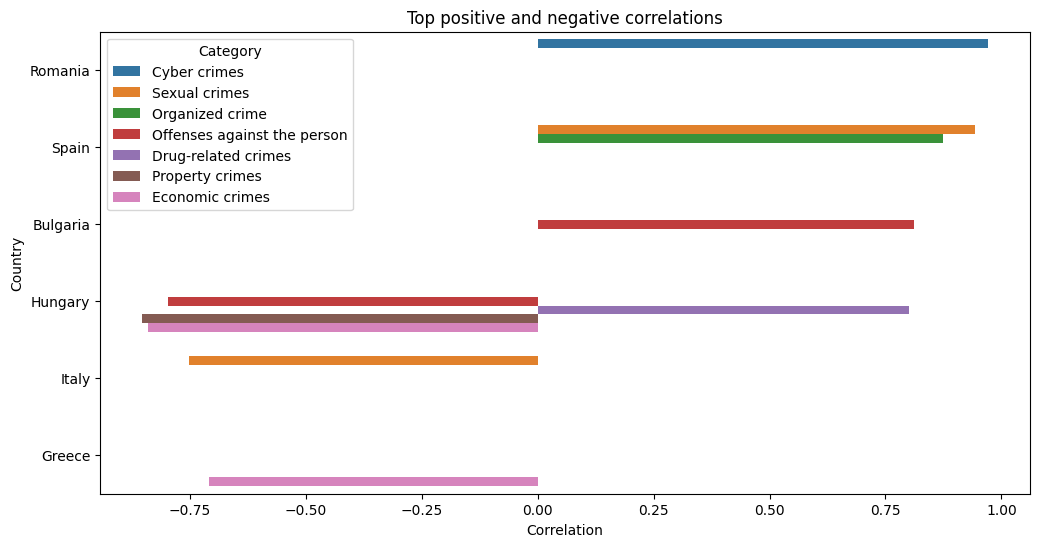

In [103]:
def plot_top_correlations(df, n=10):
    df_sorted = pd.concat([
        df.sort_values(by='Correlation', ascending=False).head(n),
        df.sort_values(by='Correlation').head(n)
    ])
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_sorted, x='Correlation', y='Country' if 'Country' in df.columns else 'Category', hue='Category' if 'Category' in df.columns else None)
    plt.title('Top positive and negative correlations')
    plt.show()

plot_top_correlations(df_categories, n=5)


In [ ]:
import plotly.graph_objects as go

def plot_time_series_plotly(merged, country, category=None):
    data = merged[merged['geo'] == country]
    if category:
        data = data[data['crime_group'] == category]
    
    grouped = data.groupby('year').agg({
        'Crimes num': 'sum',
        'foreigners_pop_share': 'mean'
    }).reset_index()
    
    fig = go.Figure()
    

    fig.add_trace(go.Scatter(
        x=grouped['year'], y=grouped['Crimes num'],
        mode='lines+markers',
        name='Crimes num',
        line=dict(color='red'),
        yaxis='y1'
    ))
    

    fig.add_trace(go.Scatter(
        x=grouped['year'], y=grouped['foreigners_pop_share'],
        mode='lines+markers',
        name='Foreigners pop share (%)',
        line=dict(color='blue'),
        yaxis='y2'
    ))
    
    fig.update_layout(
        title=f'Trend Crimes num & Foreigners pop share<br>Country: {country}' + (f', Category: {category}' if category else ''),
        xaxis_title='Year',
        yaxis=dict(
            title='Crimes num',
            tickfont=dict(color='red'),
            side='left'
        ),
        yaxis2=dict(
            title='Foreigners pop share (%)',
            tickfont=dict(color='blue'),
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.1, y=1.1, orientation='h')
    )
    
    fig.show()

In [110]:
plot_time_series_plotly(merged, 'Romania', 'Cyber crimes')

In [117]:
plot_time_series_plotly(merged, 'Germany', 'Sexual crimes')
plot_time_series_plotly(merged, 'France', 'Sexual crimes')
plot_time_series_plotly(merged, 'Austria', 'Sexual crimes')
plot_time_series_plotly(merged, 'Netherlands', 'Sexual crimes')
plot_time_series_plotly(merged, 'Spain', 'Sexual crimes')